<b>CAR PRICE PREDICTION</b>
--
Coded by : Yehezk34

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('CarPrice.csv')

In [3]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
df.shape

(4345, 9)

In [5]:
df.info

<bound method DataFrame.info of               Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4343         Toyota   14200.0      sedan       31      NaN      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year              Model  
0             yes  1991           

In [6]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [8]:
print(df.isnull().sum()/df.shape[0])

Brand           0.000000
Price           0.039586
Body            0.000000
Mileage         0.000000
EngineV         0.034522
Engine Type     0.000000
Registration    0.000000
Year            0.000000
Model           0.000000
dtype: float64


In [9]:
df.dropna(axis =0, inplace = True)
df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [11]:
print(df.duplicated().sum())

50


In [12]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [17]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [18]:
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3975,3975.000000,3975,3975.000000,3975.000000,3975,3975,3975.000000,3975
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,871,NaN,1518,NaN,NaN,1832,3604,NaN,181
mean,NaN,19056.936091,NaN,164.820126,2.763643,NaN,NaN,2006.290063,NaN
std,NaN,24976.141632,NaN,103.117252,4.965189,NaN,NaN,6.683223,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6950.000000,NaN,92.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,11400.000000,NaN,159.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21317.500000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


In [19]:
#Since 'Model' contains a lot of information about other features (Brand, Body, EngineV), including 'Model' as our 
#independent variable may cause a multi-collinearity problem
df.drop(['Model'], axis = 1, inplace = True)
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


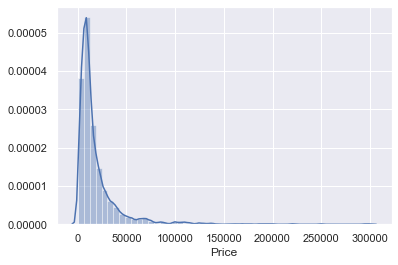

In [20]:
# Plot now!
sns.distplot(df['Price'])

In [24]:
q96 = df['Price'].quantile(0.96)
df_1 = df[df['Price']<q96]
df_1.describe()

,Price,Mileage,EngineV,Year
count,3815.000000,3815.000000,3815.000000,3815.000000
mean,15113.017028,171.062910,2.720341,2005.935256
std,12771.009038,100.438737,5.058072,6.578895
min,600.000000,0.000000,0.600000,1969.000000
25%,6800.000000,100.000000,1.800000,2002.000000
50%,10900.000000,162.000000,2.140000,2007.000000
75%,19200.000000,235.000000,3.000000,2011.000000
max,68700.000000,980.000000,99.990000,2016.000000


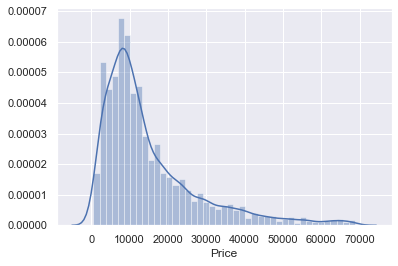

In [25]:
sns.distplot(df_1['Price'])

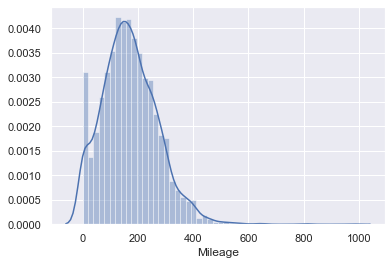

In [26]:
sns.distplot(df_1['Mileage'])

In [27]:
q99 = df_1['Mileage'].quantile(0.99)
df_2 = df_1[df_1['Mileage']<q99]
df_2.describe()

,Price,Mileage,EngineV,Year
count,3776.000000,3776.000000,3776.000000,3776.000000
mean,15182.841621,167.402542,2.723914,2006.030456
std,12756.723506,93.514619,5.083421,6.502806
min,600.000000,0.000000,0.600000,1969.000000
25%,6900.000000,100.000000,1.800000,2002.000000
50%,10950.000000,161.000000,2.000000,2007.000000
75%,19425.000000,230.250000,3.000000,2011.000000
max,68500.000000,438.000000,99.990000,2016.000000


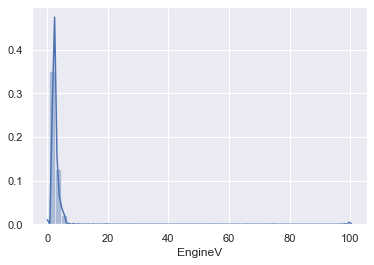

In [28]:
sns.distplot(df_2['EngineV'])

In [29]:
# Take the unique value!
sorted(df_2['EngineV'].unique())

[0.6,
 0.65,
 1.0,
 1.1,
 1.2,
 1.3,
 1.33,
 1.39,
 1.4,
 1.46,
 1.5,
 1.59,
 1.6,
 1.7,
 1.79,
 1.8,
 1.9,
 2.0,
 2.1,
 2.14,
 2.15,
 2.17,
 2.2,
 2.3,
 2.4,
 2.5,
 2.57,
 2.6,
 2.7,
 2.8,
 2.9,
 2.99,
 3.0,
 3.2,
 3.5,
 3.6,
 3.7,
 3.8,
 4.0,
 4.2,
 4.3,
 4.4,
 4.5,
 4.6,
 4.7,
 4.8,
 5.0,
 5.2,
 5.46,
 5.5,
 5.7,
 6.0,
 6.2,
 6.3,
 6.5,
 7.2,
 9.0,
 15.0,
 19.0,
 20.0,
 22.0,
 28.0,
 30.0,
 55.0,
 66.0,
 74.0,
 75.0,
 90.0,
 99.99]

In [55]:
df_3 = df_2[df_2['EngineV']<=6]
df_3.describe()

,Price,Mileage,EngineV,Year
count,3740.000000,3740.000000,3740.000000,3740.000000
mean,15136.011754,167.460963,2.392586,2006.034759
std,12685.309487,93.599323,0.893864,6.511156
min,600.000000,0.000000,0.600000,1969.000000
25%,6900.000000,100.000000,1.800000,2002.000000
50%,10950.000000,161.000000,2.000000,2007.000000
75%,19200.000000,230.250000,2.990000,2011.000000
max,68500.000000,438.000000,6.000000,2016.000000


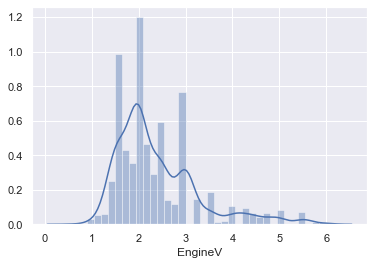

In [56]:
sns.distplot(df_3['EngineV'])

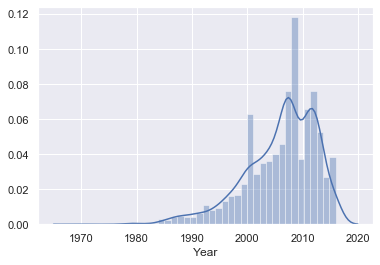

In [57]:
sns.distplot(df_3['Year'])

In [58]:
q01 = df_3['Year'].quantile(0.01)
df_4 = df_3[df_3['Year'] > q01]

df_4.describe()

,Price,Mileage,EngineV,Year
count,3686.000000,3686.000000,3686.000000,3686.000000
mean,15310.375505,166.778079,2.399124,2006.348074
std,12682.982953,93.142887,0.896992,6.004757
min,800.000000,0.000000,0.600000,1988.000000
25%,7000.000000,100.000000,1.800000,2003.000000
50%,11000.000000,160.000000,2.000000,2007.000000
75%,19500.000000,230.000000,3.000000,2011.000000
max,68500.000000,438.000000,6.000000,2016.000000


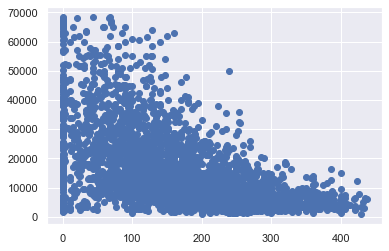

<Figure size 360x360 with 0 Axes>

In [59]:
# Plot the price!
plt.scatter(df_4['Mileage'],df_4['Price'])
plt.figure(figsize = (5,5))
plt.show()

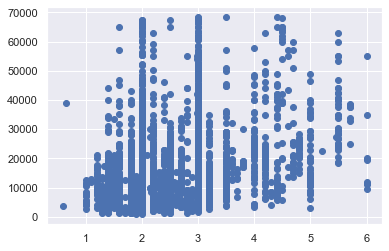

<Figure size 360x360 with 0 Axes>

In [60]:
plt.scatter(df_4['EngineV'],df_4['Price'])
plt.figure(figsize = (5,5))
plt.show()

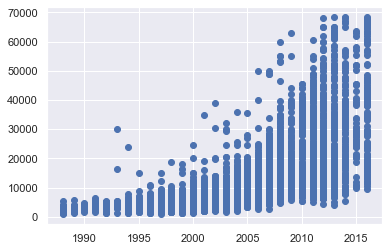

<Figure size 360x360 with 0 Axes>

In [61]:
plt.scatter(df_4['Year'],df_4['Price'])
plt.figure(figsize = (5,5))
plt.show()

In [62]:
df_4['Log_Price'] = np.log(df_4['Price'])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
df_4.drop(['Price'], axis = 1, inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
df_4.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


In [67]:
#Resetting the index after data cleaning
df_cleaned = df_4.reset_index(drop = True)
df_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


In [68]:
# FEATURE SELECTION!
# ANOVA Analysis (f_regression) to check if a particular numerical feature is significant

xnum = df_cleaned[['Mileage','EngineV','Year']]
y = df_cleaned['Log_Price']

from sklearn.feature_selection import f_regression
f_value, p_value = f_regression(xnum,y)
for i in range(len(p_value)):
    print(xnum.columns[i], p_value[i])

Mileage 5.094400652730928e-307
EngineV 2.3564452450909054e-119
Year 0.0


In [69]:
df_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


In [71]:
# Check if a particular categorical feature is significant
xcat = df_cleaned[['Brand','Body','Engine Type', 'Registration']]
y = df_cleaned[['Log_Price']]

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif

xcat['Brand'] = LabelEncoder().fit_transform(xcat['Brand'])
xcat['Body'] = LabelEncoder().fit_transform(xcat['Body'])
xcat['Engine Type'] = LabelEncoder().fit_transform(xcat['Engine Type'])
xcat['Registration'] = LabelEncoder().fit_transform(xcat['Registration'])

for i in range(len(xcat.columns)):
    f_val, p_val = f_classif(y, xcat[xcat.columns[i]])
    print(xcat.columns[i],p_val)

Brand [1.683055e-61]
Body [8.42337071e-202]
Engine Type [7.1690495e-05]
Registration [4.59235951e-218]


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

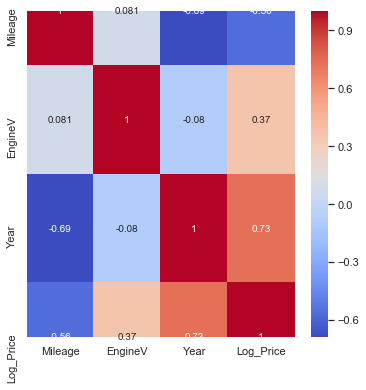

In [73]:
# Plot again
cor = df_cleaned.corr()
plt.figure(figsize = (6,6))
sns.heatmap(cor, cmap = 'coolwarm', annot = True)
plt.show()

As observed from the correlation graph, 'Year' and 'Mileage' seem to have a high correlation. It's understandable that in most cases, the older a car gets, the higher its mileage will be. I've decided to remove the feature 'Year' from the data

In [75]:
df_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


From the result of the ANOVA analysis, we can conclude that the other features are important

In [76]:
x = df_cleaned[['Brand','Body','Mileage','EngineV','Engine Type','Registration', 'Year']]
y = df_cleaned['Log_Price']

df_cleaned.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
count,3686,3686,3686.000000,3686.000000,3686,3686,3686.000000,3686.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,833,1414,NaN,NaN,1693,3324,NaN,NaN
mean,NaN,NaN,166.778079,2.399124,NaN,NaN,2006.348074,9.330933
std,NaN,NaN,93.142887,0.896992,NaN,NaN,6.004757,0.799617
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,NaN,100.000000,1.800000,NaN,NaN,2003.000000,8.853665
50%,NaN,NaN,160.000000,2.000000,NaN,NaN,2007.000000,9.305651
75%,NaN,NaN,230.000000,3.000000,NaN,NaN,2011.000000,9.878170


In [79]:
# Scaling the numerical variables and encoding the categorical variables
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer([('oh',OneHotEncoder(),[0,1,4]),
                                 ('od',OrdinalEncoder(),[5]),
                                 ('ss',StandardScaler(),[2,3,6])], remainder = 'passthrough')

x_new = transformer.fit_transform(x)
pd.DataFrame(x_new).head(20)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.183524,-0.445018,-2.556333
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.794172,0.558471,-1.223875
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.053274,2.899948,-0.557646
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.786231,2.007957,0.108583
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.502287,-0.445018,0.774812
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.912286,-0.445018,-1.556989
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.356725,0.335474,-0.057974
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.281562,-1.002513,0.941369
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.485577,-0.668016,-1.223875
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.109759,-1.002513,0.774812


In [80]:
# Now split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new,y, test_size = 0.2, random_state = 0)
print(x_new.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(3686, 21)
(2948, 21)
(738, 21)
(3686,)
(2948,)
(738,)


In [82]:
# Use a Linear Regression
model = LinearRegression()
model.fit(x_train, y_train) # Train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
# Take the score!
print(model.score(x_train, y_train))

0.8785384630823434


In [85]:
# Calculating adjusted_r_squared score
def adjusted_r_squared(x_train, y_train):
    n = x_train.shape[0]
    p = x_train.shape[1]
    r_squared = model.score(x_train,y_train)
    result = 1 - ( 1-r_squared)*(n-1)/(n-p-1)
    return result

adjusted_r_squared(x_train,y_train)

0.8776667295637957

In [97]:
print("Coefisien ->\n",model.coef_)
print("\n\n")
print("Intercept ->\n",model.intercept_)

Coefisien ->
 [ 5.81515573e+11  5.81515573e+11  5.81515573e+11  5.81515573e+11
  5.81515573e+11  5.81515573e+11  5.81515573e+11  4.75126262e+12
  4.75126262e+12  4.75126262e+12  4.75126262e+12  4.75126262e+12
  4.75126262e+12 -1.45849271e+12 -1.45849271e+12 -1.45849271e+12
 -1.45849271e+12  8.82873535e-01 -6.75048828e-02  1.94335938e-01
  4.92553711e-01]



Intercept ->
 -3874285476052.0684


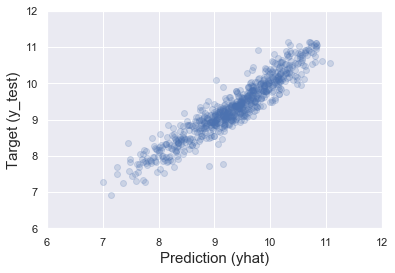

In [98]:
yhat_test = model.predict(x_test)

plt.scatter(yhat_test, y_test, alpha =0.2)
plt.xlabel('Prediction (yhat)', fontsize = 15)
plt.ylabel('Target (y_test)', fontsize = 15)
plt.xlim(6,12)
plt.ylim(6,12)
plt.show()

In [100]:
# Here we got the prediction!
df_check = pd.DataFrame(np.exp(yhat_test), columns = ['Prediction'])
print(df_check.head())

     Prediction
0   6444.588683
1   3468.117392
2   6463.496998
3   2474.923694
4  13050.249091


In [102]:
y_test = y_test.reset_index(drop = True)
df_check['Target'] = np.exp(y_test)
print(df_check.head())

     Prediction   Target
0   6444.588683   8200.0
1   3468.117392   2500.0
2   6463.496998   5200.0
3   2474.923694   2600.0
4  13050.249091  13500.0


In [103]:
df_check['Difference'] = df_check['Prediction'] - df_check['Target']
df_check.head()

,Prediction,Target,Difference
0,6444.588683,8200.0,-1755.411317
1,3468.117392,2500.0,968.117392
2,6463.496998,5200.0,1263.496998
3,2474.923694,2600.0,-125.076306
4,13050.249091,13500.0,-449.750909


In [104]:
df_check['Difference in %'] = np.absolute(df_check['Difference']/df_check['Target']*100)
df_check.head()

,Prediction,Target,Difference,Difference in %
0,6444.588683,8200.0,-1755.411317,21.407455
1,3468.117392,2500.0,968.117392,38.724696
2,6463.496998,5200.0,1263.496998,24.298019
3,2474.923694,2600.0,-125.076306,4.810627
4,13050.249091,13500.0,-449.750909,3.331488


In [105]:
df_check['Difference in %'].mean()

21.235612273695462

In [107]:
pd.options.display.max_rows = None

In [108]:
df_check

,Prediction,Target,Difference,Difference in %
0,6444.588683,8200.00,-1755.411317,21.407455
1,3468.117392,2500.00,968.117392,38.724696
2,6463.496998,5200.00,1263.496998,24.298019
3,2474.923694,2600.00,-125.076306,4.810627
4,13050.249091,13500.00,-449.750909,3.331488
5,8303.347805,24000.00,-15696.652195,65.402717
6,15354.442983,13999.00,1355.442983,9.682427
7,1786.978082,2700.00,-913.021918,33.815627
8,6870.285470,9600.00,-2729.714530,28.434526
9,25401.871338,27300.00,-1898.128662,6.952852


In [110]:
# Give the result as csv file too!
df_check.to_csv("CarPrice_Prediction_Result.csv")

Coded by : Yehezk34